In [46]:
import numpy as np
import pandas as pd

In [47]:
df = pd.read_csv('placement.csv')

In [48]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [50]:
df.shape

(100, 4)

In [51]:
df = df.iloc[:,1:]

In [52]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [53]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [54]:
import matplotlib.pyplot as plt


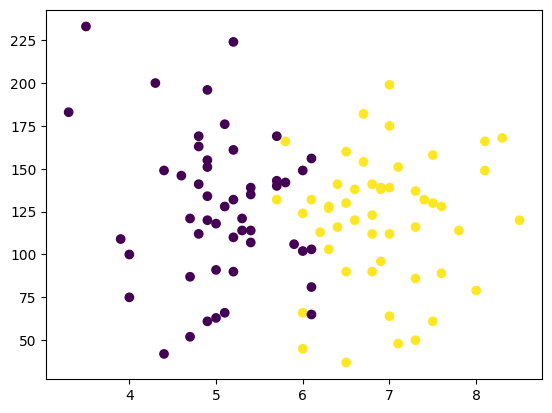

In [55]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [56]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [57]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [58]:
y.shape

(100,)

In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [60]:
X_train

,cgpa,iq
30,7.6,128.0
15,5.1,176.0
48,6.6,138.0
46,5.3,114.0
20,6.6,120.0
...,...,...
88,4.4,149.0
99,6.2,113.0
21,7.1,151.0
58,8.0,79.0


In [61]:
y_train

30    1
15    0
48    1
46    0
20    1
     ..
88    0
99    1
21    1
58    1
66    1
Name: placement, Length: 90, dtype: int64

In [62]:
X_test

,cgpa,iq
61,7.3,137.0
49,5.4,135.0
57,6.5,130.0
40,4.9,134.0
26,7.0,199.0
77,7.3,50.0
56,6.1,65.0
90,7.3,86.0
81,5.4,107.0
41,5.4,114.0


In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

In [65]:
X_train = scaler.fit_transform(X_train)

In [66]:
X_train

array([[ 1.41499912,  0.08951191],
       [-0.74347412,  1.30171076],
       [ 0.55160983,  0.34205333],
       [-0.57079626, -0.26404609],
       [ 0.55160983, -0.11252124],
       [-1.69320234, -0.61760409],
       [-0.13910161,  0.4430699 ],
       [-1.0024909 ,  0.9734069 ],
       [ 0.72428769, -0.31455438],
       [-0.82981305, -1.55200737],
       [ 0.03357625, -2.00658194],
       [-0.65713519, -0.36506266],
       [-0.65713519,  2.5139096 ],
       [-0.22544054,  1.12493176],
       [ 1.15598233, -0.21353781],
       [-0.65713519,  0.92289861],
       [ 0.03357625, -1.47624494],
       [ 0.37893197, -0.21353781],
       [ 0.81062662,  0.36730748],
       [ 0.89696555, -0.31455438],
       [-0.22544054,  0.39256162],
       [ 0.37893197,  0.41781576],
       [-0.22544054,  0.19052848],
       [-0.74347412,  0.08951191],
       [-1.77954127, -0.39031681],
       [ 1.58767698, -0.26404609],
       [ 0.72428769,  0.41781576],
       [ 0.11991518,  0.19052848],
       [-0.13910161,

In [67]:
X_test = scaler.transform(X_test)

In [68]:
X_test

array([[ 1.15598233,  0.31679919],
       [-0.48445733,  0.2662909 ],
       [ 0.4652709 ,  0.14002019],
       [-0.91615197,  0.24103676],
       [ 0.89696555,  1.88255604],
       [ 1.15598233, -1.88031122],
       [ 0.11991518, -1.50149908],
       [ 1.15598233, -0.97116209],
       [-0.48445733, -0.44082509],
       [-0.48445733, -0.26404609]])

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
clf = LogisticRegression()

In [71]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [72]:
y_pred = clf.predict(X_test)

In [73]:
y_test

61    1
49    0
57    1
40    0
26    1
77    1
56    0
90    1
81    0
41    0
Name: placement, dtype: int64

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_test,y_pred)

0.9

In [76]:
#!pip install mlxtend

from mlxtend.plotting import plot_decision_regions

<Axes: >

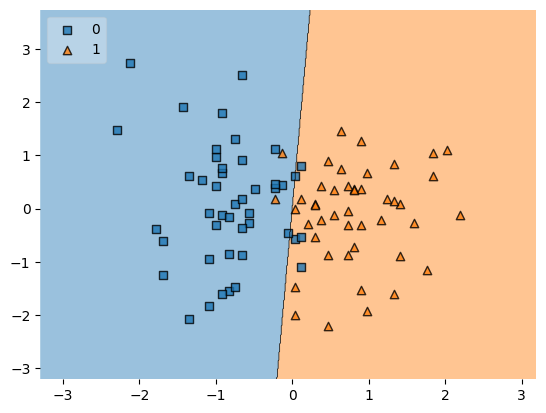

In [77]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [78]:
import pickle

In [79]:
pickle.dump(clf,open('model.pkl','wb'))